In [3]:
import numpy as np
from numpy.random import seed
np.random.seed(0)

import pandas as pd

import seaborn as sns
sns.set_context('notebook')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('classic')
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import statistics
from scipy import stats
from scipy.stats import skew
from scipy.stats import kstest
from scipy.stats import ks_2samp

rng = np.random.default_rng()
from sklearn.metrics.pairwise import cosine_similarity

from datetime import datetime

from skimage import io
from PIL import Image

In [4]:
df_whole = pd.read_csv('../../PrimaryDataset/eclipse_preproccessed_whole_dataset.csv')
df_sim = pd.read_csv('../../PreProcessedData/Eclipse/Eclipse_final_sim.csv')
df_dissim = pd.read_csv('../../PreProcessedData/Eclipse/Eclipse_final_dis.csv')

print('Dimensions of Whole Dataset: ', df_whole.shape)
print('Dimensions of Textually Similar Dataset: ', df_sim.shape)
print('Dimensions of Dataset: ', df_dissim.shape)

Dimensions of Whole Dataset:  (46316, 10)
Dimensions of Textually Similar Dataset:  (593, 13)
Dimensions of Dataset:  (723, 13)


# Statistics of Datasets

In [5]:
#To Describe Length of 'Description' of the Bugs
df_desc = pd.DataFrame()
df_desc['Whole'] = df_whole[['Description']].apply(lambda col: col.str.len().describe())
df_desc['Textually Similar'] = df_sim[['Description']].apply(lambda col: col.str.len().describe())
df_desc['Textually Disimilar'] = df_dissim[['Description']].apply(lambda col: col.str.len().describe())

#To show results
df_desc

,Whole,Textually Similar,Textually Disimilar
count,46263.000000,593.000000,723.000000
mean,728.861012,3557.340641,303.049793
std,1676.929940,3745.048652,719.866043
min,1.000000,35.000000,3.000000
25%,153.000000,1118.000000,94.000000
50%,312.000000,2376.000000,153.000000
75%,655.000000,4610.000000,247.000000
max,32759.000000,28272.000000,10072.000000


# Skewness and Kurt of Textually Similar/Dissimilar Dataset

In [6]:
df_dict = {'Dataset':[], 'Skewness':[], 'Kurt':[], 'Mean':[], 'Median':[], 'Standard Deviation':[]}
df_cos = pd.DataFrame(df_dict)

df_sim_cos = df_sim["Average_Cos_Similarity_Score"];
skewness_sim = df_sim_cos.skew();
kurt_sim = df_sim_cos.kurt();
mean_sim = df_sim_cos.mean()
median_sim = df_sim_cos.median()
std_sim = df_sim_cos.std()

df_dissim_cos = df_dissim["Average_Cos_Similarity_Score"];
skewness_dissim = df_dissim_cos.skew();
kurt_dissim = df_dissim_cos.kurt();
mean_dissim = df_dissim_cos.mean()
median_dissim = df_dissim_cos.median()
std_dissim = df_dissim_cos.std()

df_cos.loc[len(df_cos.index)] = ['Textually Similar', round(skewness_sim,2), round(kurt_sim,2), 
                                 round(mean_sim,2), round(median_sim,2), round(std_sim,2)]
df_cos.loc[len(df_cos.index)] = ['Textually Dissimilar', round(skewness_dissim,2), round(kurt_dissim,2), 
                                 round(mean_dissim,2), round(median_dissim,2), round(std_dissim,2)]

#To show results
df_cos

,Dataset,Skewness,Kurt,Mean,Median,Standard Deviation
0,Textually Similar,0.39,-1.26,0.09,0.09,0.02
1,Textually Dissimilar,-0.54,-0.18,0.02,0.02,0.01


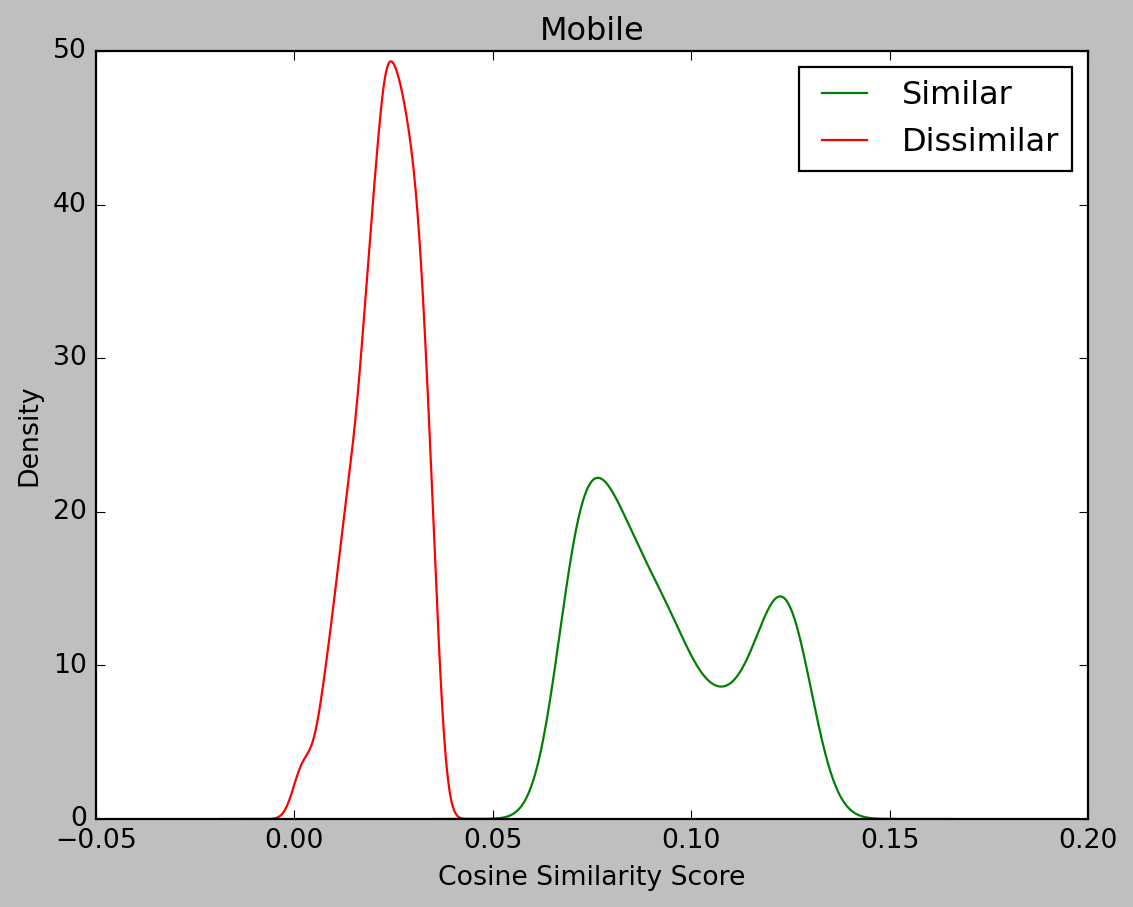

In [7]:
#To Plot Graph
ax = plt.axes()
x = df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
y = df_dissim.Average_Cos_Similarity_Score.plot.density(color='red')

ax.set_xlabel('Cosine Similarity Score')
ax.set_ylabel('Density')
ax.set_title('Mobile')

plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()

# Cosine Similarity Score Difference

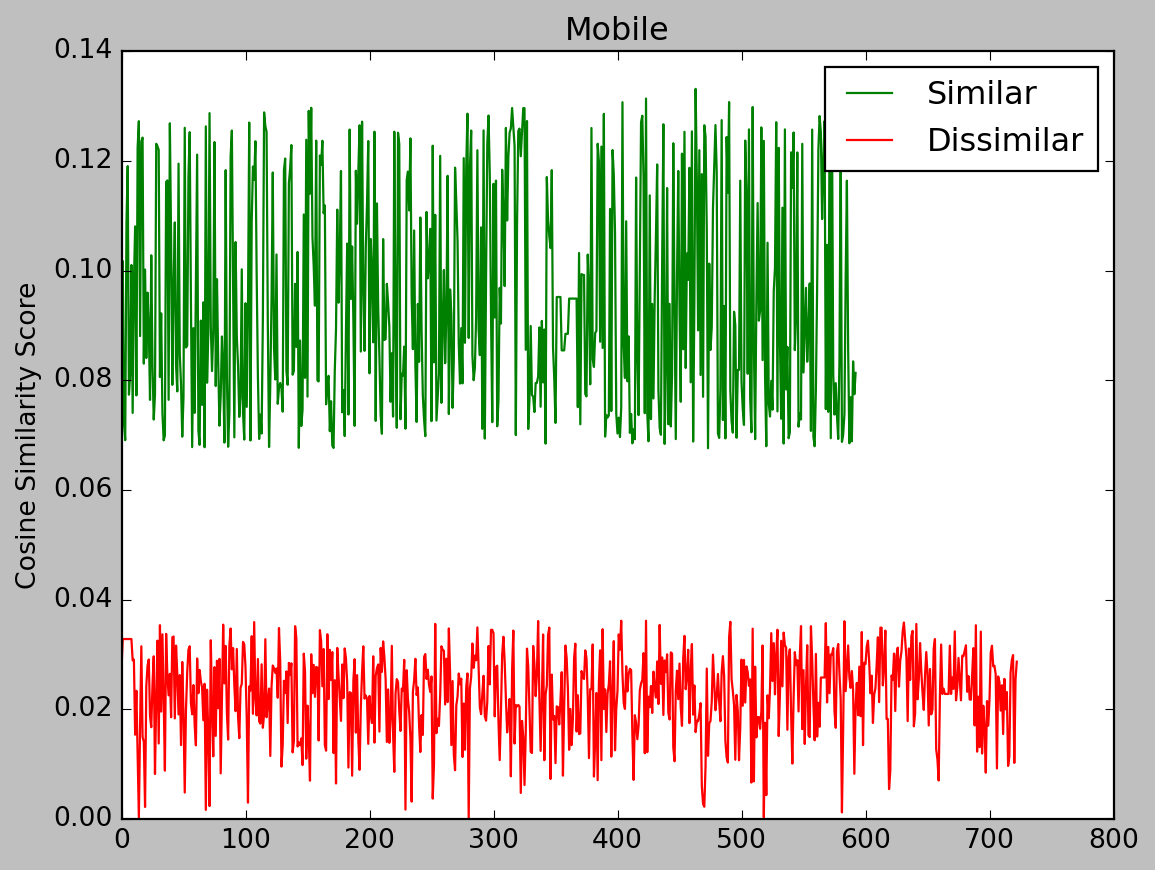

In [8]:
df_sim["Average_Cos_Similarity_Score"].plot(color='green')
df_dissim["Average_Cos_Similarity_Score"].plot(color='red')

plt.ylabel('Cosine Similarity Score')
plt.title('Mobile')

plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()